In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import qutip
import itertools

In [26]:
terms = ['YXXX', 'YXYY', 'YYXY', 'YYYX', 'XXXX', 'XXYY', 'XYXY', 'XYYX',
         'YXXY', 'YXYX', 'YYXX', 'YYYY', 'XXXY', 'XXYX', 'XYXX', 'XYYY']

In [27]:
pauli_to_matrix = {'I': qutip.identity(2),
                   'X': qutip.sigmax(),
                   'Y': qutip.sigmay(),
                   'Z': qutip.sigmaz()}


def commutes(term1, term2):
    term1_matrices = [pauli_to_matrix[pauli] for pauli in term1]
    term2_matrices = [pauli_to_matrix[pauli] for pauli in term2]
    return qutip.commutator(qutip.tensor(*term1_matrices), qutip.tensor(*term2_matrices)).norm() == 0

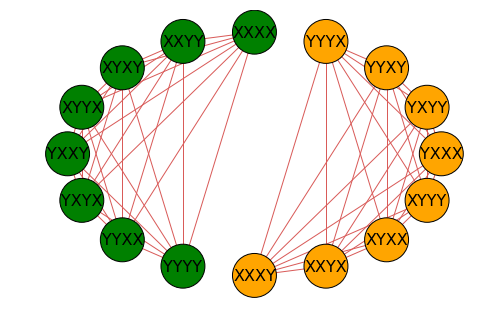

In [33]:
G = nx.Graph()
node_color = []
for term in terms:
    if term in ['XXXX', 'XXYY', 'XYXY', 'XYYX', 'YXXY', 'YXYX', 'YYXX', 'YYYY']:
        node_color.append('green')
    else:
        node_color.append('orange')
    G.add_node(term)

colors = []
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if commutes(terms[i], terms[j]):
            G.add_edge(terms[i], terms[j], color='b')
            colors.append('#d95b59')
                
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color=node_color, node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
plt.savefig("JW_pqrs_term.svg")